In [4]:
pip install mltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns                      # Genral Packages
import matplotlib.pyplot as plt 
import os

In [40]:
#NLP Packaages
import nltk           #Natural Language Processing Toolkit
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer   #counting each of the word in entire reviews
from sklearn.feature_extraction.text import TfidfVectorizer   #To change the word dimensions
from collections import Counter
from wordcloud import WordCloud      #Expressing the words in a word cloud

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier                     #Model Packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [42]:
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] =14, 6
plt.style.use('ggplot')

#Importing DataSet

In [43]:
amazon_reviews = pd.read_csv('Amazon_Review.csv')   #DataSet from Kaggle
amazon_reviews.head(3)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [44]:
#Getting no. of words by spliting them by a space
words_per_review = amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
print('Average Words:', words_per_review.mean())
print('Skewness:', words_per_review.skew()) #how symmetric is our distribution


Average Words: 77.9028
Skewness: 4.612459483340116


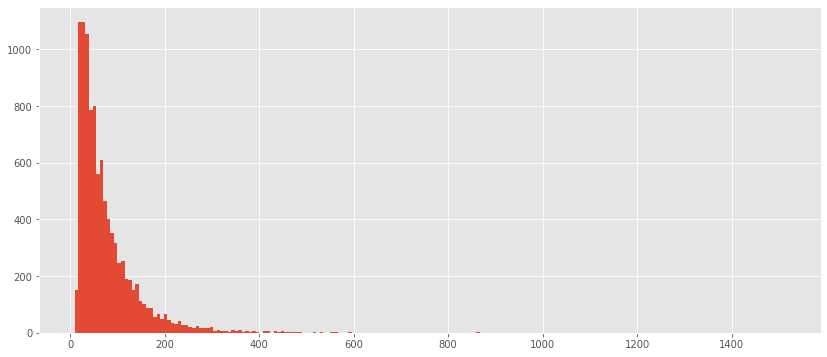

In [45]:
words_per_review.hist(bins = 200)


In [46]:
percent_val = 1000 * amazon_reviews['Score'].value_counts()/len(amazon_reviews)
percent_val

5    618.3
4    143.3
1     93.2
3     86.2
2     59.0
Name: Score, dtype: float64

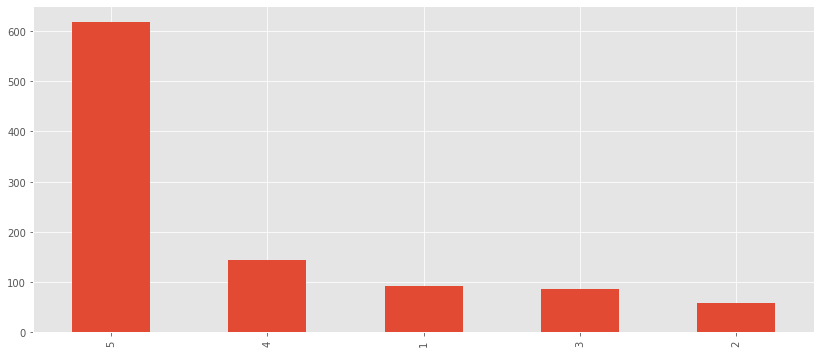

In [47]:
percent_val.plot.bar()
plt.show()

In [48]:
word_cloud_text = ''.join(amazon_reviews['Text'])

wordcloud = WordCloud(max_font_size =100,  #max. fomt size
                      max_words=100, #Maximum Number of words
                      background_color = "white",
                      scale = 10,
                      width = 800,
                      height = 400
                      ).generate(word_cloud_text)


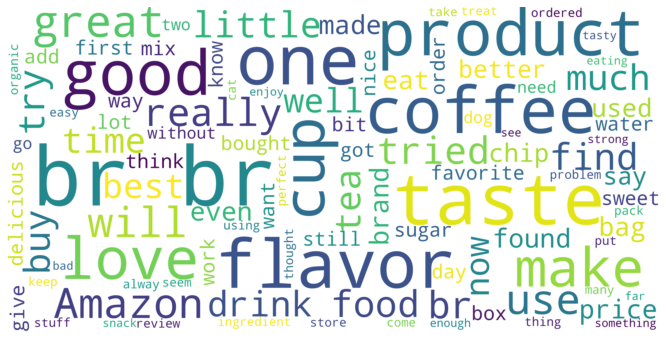

In [49]:
plt.figure()
plt.imshow(wordcloud,
          interpolation = 'bilinear') #to make the image smoothly
plt.axis("off")
plt.show()
#Larger word have high frequency and smaller word have low frequency

Standerizing the rating for sentiment
Raing of 4 to 5 we marked as positive reviews
Rating of 1 to 2 we marked as negative reviews
Rating of 3 we marked as Neutral and they will removed because they are neutral

In [50]:
# Mapping the ratings
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score> 3,1,0) #Greater than 3 marked as 1 less than 3 marked as 0

#removing neutralReviews
amazon_reviews = amazon_reviews[amazon_reviews.Score!= 3]

#orinting the count of each class
amazon_reviews['Sentiment_rating'].value_counts()

1    7616
0    1522
Name: Sentiment_rating, dtype: int64

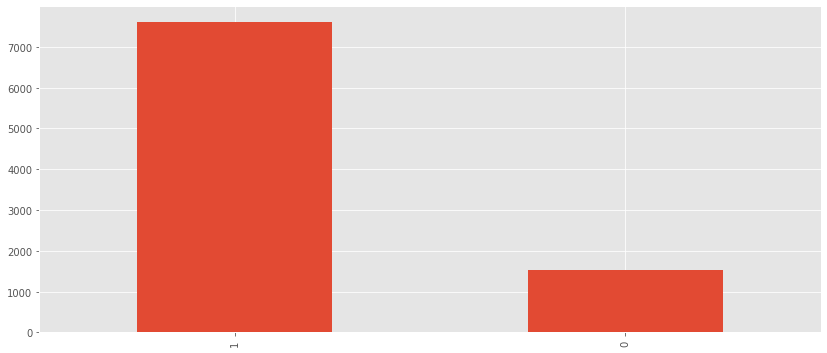

In [51]:
amazon_reviews.Sentiment_rating.value_counts().plot.bar()


PRE-PROCESSING OF DATA
STEPS:
convert the words to lower/upper case, 
 removing special character, 
 removing stopwords and/highlow frequency words, 
 stteming/lemmatization (those words that mean same but look diffrent like run and running)

convert the words to lower/upper case

In [75]:
amazon_reviews['reviews_text_new'] = amazon_reviews['Text'].str.lower()

In [76]:
print(amazon_reviews['reviews_text_new'])

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price.  there was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say, the organic formula ...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old... he had gas and constip...
Name: reviews_text_new, Length: 9138, dtype: object


for unique words we use tokenization

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [77]:
from nltk import word_tokenize

word_tokenize("It is awsome :D")

['It', 'is', 'awsome', ':', 'D']

In [78]:
#For reviews converted to lowercase
token_lists =[word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("No. of unique tokens then :", len(set(tokens)))

No. of unique tokens then : 27884


In [79]:
#For reviews converted to lowercase
token_lists =[word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("No. of unique tokens now :", len(set(tokens)))

No. of unique tokens now : 22852


removing special character

In [80]:
spl_chars = amazon_reviews['reviews_text_new'].apply(lambda review:
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

#put it into single list
flat_list = [item for sublist in spl_chars for item in sublist]

#unique characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

In [81]:
#remove Special Characters from reviews
review_backup = amazon_reviews['reviews_text_new'].copy()
amazon_reviews['reviews_text_new'] = amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [86]:
print("- Old Review -")
print(review_backup.values[6])
print("\n- New Review -")
print(amazon_reviews['reviews_text_new'][6])

- Old Review -
this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!

- New Review -
this saltwater taffy had great flavors and was very soft and chewy   each candy was individually wrapped well   none of the candies were stuck together  which did happen in the expensive version  fralinger s   would highly recommend this candy   i served it at a beach themed party and everyone loved it 


Number of Drooped character because of tokens

In [84]:
#For reviews converted to lowercase
token_lists =[word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("No. of unique tokens then :", len(set(tokens)))

No. of unique tokens then : 27884


In [85]:
#For reviews converted to lowercase
token_lists =[word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("No. of unique tokens now :", len(set(tokens)))

No. of unique tokens now : 18039


In [88]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

removing stopwords and/highlow frequency words

In [90]:
from nltk.corpus import stopwords
print('Languages')
print(stopwords.fileids())

Languages
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [93]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [98]:
#Removing those stopwords
stop_words = set(eng_stop_words)
stopword = []
without_stop_words = []
sentence = amazon_reviews['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)
        
print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most 

-- Stopwords in the sentence --
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

-- Non-stopwords in the sentence --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [99]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

amazon_reviews['reviews_text_nonstop'] = amazon_reviews['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
amazon_reviews[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wid...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
9995,we switched from the advance similac to the or...,"[switched, advance, similac, organic, product,..."
9996,like the bad reviews say the organic formula ...,"[like, bad, reviews, say, organic, formula, co..."
9997,i wanted to solely breastfeed but was unable t...,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,"[love, fact, get, delieved, house, delievy, ch..."


Stteming/lemmatization (those words that mean same but look diffrent)

In [100]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [101]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


Building a Model

In [102]:
amazon_reviews[['Text', 'Score', 'Sentiment_rating']].head(5)

,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


Since 1-grams are sometimes insufficient to understand the significance of certain words in our text, it is natural to consider blocks of words, or n-grams.

In [104]:
from nltk import ngrams

sentence = 'A bird in the hand worths two in the bush'

for n in range(1, 5):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]


In [128]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(amazon_reviews['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,0003,000kwh,002,008,0100,0174,02,03,...,zomg,zon,zoo,zoom,zotz,zucchini,zuke,zukes,zupas,zuppa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(amazon_reviews['reviews_text_new'])
bow_data

<9138x18039 sparse matrix of type '<class 'numpy.int64'>'
	with 493450 stored elements in Compressed Sparse Row format>

In [130]:
#train Test split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, amazon_reviews['Sentiment_rating'], train_size = 0.8, random_state = 0)

In [131]:
#Train the model
final_model = LogisticRegression()

In [132]:
final_model.fit(X_train_bow,y_train_bow)
prediction = final_model.predict(X_test_bow)
print("f1 Score: ", f1_score(y_test_bow, prediction))

f1 Score:  0.9526854219948849


In [133]:
#including the n grams is increasing the feature space
#Modify the model in bigram, trigram, and 4-gram
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,3))

bow_data = bow_counts.fit_transform(amazon_reviews.reviews_text_new)
bow_data

<9138x672618 sparse matrix of type '<class 'numpy.int64'>'
	with 1849497 stored elements in Compressed Sparse Row format>

In [134]:
#train Test split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, amazon_reviews['Sentiment_rating'], train_size = 0.8, random_state = 0)

In [135]:
#Train the model
final_model_new = LogisticRegression()

In [137]:
final_model_new.fit(X_train_bow,y_train_bow)
prediction = final_model_new.predict(X_test_bow)
print("f1 Score: ", f1_score(y_test_bow, prediction))

f1 Score:  0.9553459119496854


In [138]:
weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   final_model_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names


In [139]:
weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
244732,great,1.373646
164944,delicious,1.061554
432409,perfect,0.945708
194917,excellent,0.941520
553334,the best,0.890421
239296,good,0.864118
378011,nice,0.860543
90030,best,0.836155
338481,love,0.786793
502770,smooth,0.746774


In [142]:
weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for positive reviews

,words,weights
662638,worst,-0.628103
183856,eat it,-0.628413
74571,away,-0.630727
628150,very disappointed,-0.642788
532579,t,-0.656151
469916,return,-0.659873
637675,waste,-0.676164
519176,stick,-0.697768
75124,awful,-0.708930
77097,bad,-0.735374


we cleaned up and featurized an Amazon reviews dataset and built some classification models on these featurizations to predict sentiment. We saw that bag-of-words. Through increase the set of n-grams we used from 1-grams to up to 4-grams, we were able to get our logistic regression model accuracy up to 95%.
NoteBook Created By Manav Gandhi